In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
import statistics
import seaborn as sns

## Load Emergent Properties and Node DataFrames for all Countries

In [2]:
allSpecies = pd.read_csv('./Files/Dataframes/allCohorts_allSpecies.csv').set_index("SampleName")
crcSpecies = allSpecies[allSpecies['Cohort']=='CRC'].copy()
healthySpecies = allSpecies[allSpecies['Cohort']=='Healthy'].copy()
allSpecies.shape

(252, 1361)

In [3]:
emergentDF = pd.read_csv("./Files/Networks/crc_healthy_networkProperties_168.csv").set_index("Network")
eDF = emergentDF.copy()
eDF

,Nodes,Edges,Positive_Edges,Negative_Edges,Nodes_in_Largest_Component,Single_Nodes,Density,Average_Degree,Modularity,Connectedness,ASPL,Genera_Assortativity,Degree_Assortativity,Transitivity
Network,,,,,,,,,,,,,,
CRC,165,324,296,28,110,36,0.023947,3.927273,0.689225,False,1.686786,0.166368,0.287004,0.37914
Healthy,165,292,284,8,110,40,0.021582,3.539394,0.741973,False,1.554327,0.184378,0.443616,0.45254


In [4]:
tempDF1 = eDF[['Nodes','Edges','Positive_Edges','Negative_Edges','Density','Average_Degree','Modularity','ASPL','Transitivity','Genera_Assortativity','Degree_Assortativity']].copy()
tempDF1['P:N Ratio'] = 1
for i in tempDF1.index:
    tempDF1.at[i,'P:N Ratio'] = tempDF1.at[i,'Positive_Edges']/tempDF1.at[i,'Negative_Edges']
#tempDF1   
#tempDF2 = tempDF1[['Nodes','Edges','P:N Ratio','Density','Average_Degree','Modularity','ASPL','Transitivity','Genera_Assortativity','Degree_Assortativity']].copy()
tempDF2 = tempDF1[['Nodes','Edges','Density','ASPL','Transitivity','Modularity','Degree_Assortativity','Genera_Assortativity']].copy()

tempDF3 = tempDF2.rename(columns={'Average_Degree':'Average Degree','Genera_Assortativity':'Genera Assortativity','Degree_Assortativity':'Degree Assortativity'}).copy()

tempDF3

,Nodes,Edges,Density,ASPL,Transitivity,Modularity,Degree Assortativity,Genera Assortativity
Network,,,,,,,,
CRC,165,324,0.023947,1.686786,0.37914,0.689225,0.287004,0.166368
Healthy,165,292,0.021582,1.554327,0.45254,0.741973,0.443616,0.184378


In [5]:
tempDF4 = tempDF3[['Nodes','Edges','Density','ASPL','Transitivity','Modularity']].copy()
tempDF4

,Nodes,Edges,Density,ASPL,Transitivity,Modularity
Network,,,,,,
CRC,165,324,0.023947,1.686786,0.37914,0.689225
Healthy,165,292,0.021582,1.554327,0.45254,0.741973


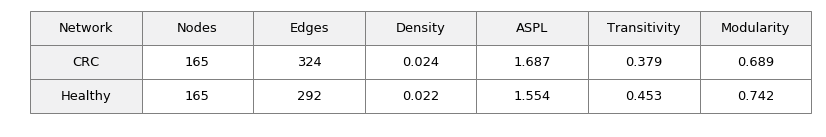

In [6]:
import six
def render_mpl_table(data, col_width=1.0, row_height=0.625, font_size=13,
                     header_color='#f1f1f2', row_colors=['w', 'w'], edge_color='grey',
                     bbox=[0, 0, 1, 1], header_columns=0, 
                     ax=None, **kwargs):
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    tab_2 = []
    for i in data.values:
        numm = 0
        tempList = []
        for j in i:
            if numm < 3:
                tempList.append(j)
            else:
                tempList.append('%.3f' % j)
            numm+=1
        tab_2.append(tempList)
        
    mpl_table = ax.table(cellText=tab_2, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='normal', color='black', )
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

fig = render_mpl_table(tempDF4.reset_index(), header_columns=1, col_width=2.0)
#plt.savefig("EmergentNetwork.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Load Random Graph for comparisons
Rdf_crc = pd.read_csv("./Files/Dataframes/crc_RandomGraphComp_168.csv")
Rdf_healthy = pd.read_csv("./Files/Dataframes/healthy_RandomGraphComp_168.csv")

Rdf_crc.drop(columns=['Unnamed: 0'], inplace=True)
Rdf_healthy.drop(columns=['Unnamed: 0'], inplace=True)

## Render Pfam and TIGRFAM table

In [10]:
functionTableDF = pd.read_csv("./Files/Dataframes/DAFunctions.csv").set_index("Pfam or TIGRFAM")
functionTableDF

,Description,Healthy Median,CRC Median,qvalue
Pfam or TIGRFAM,,,,
PF08191,LRR adjacent,-5.673367,3.484002,1.224731e-06
PF09403,Adhesion protein FadA,-5.738720,2.727507,1.254528e-05
PF07087,Protein of unknown function (DUF1353),-6.032200,-3.256442,5.295768e-05
PF04122,Putative cell wall binding repeat 2,2.123856,3.819037,8.606748e-04
PF17886,HSP20-like domain found in ArsA,-6.032200,-5.534243,1.748995e-02
PF16728,Domain of unknown function (DUF5066),-6.061185,-5.613685,1.748995e-02
PF01345,Domain of unknown function (DUF11),4.196018,4.807215,2.122640e-02
PF08254,Threonine leader peptide,0.656293,-6.235979,1.110805e-14
PF14255,Cysteine-rich CPXCG,-5.356354,-6.229333,4.435526e-10


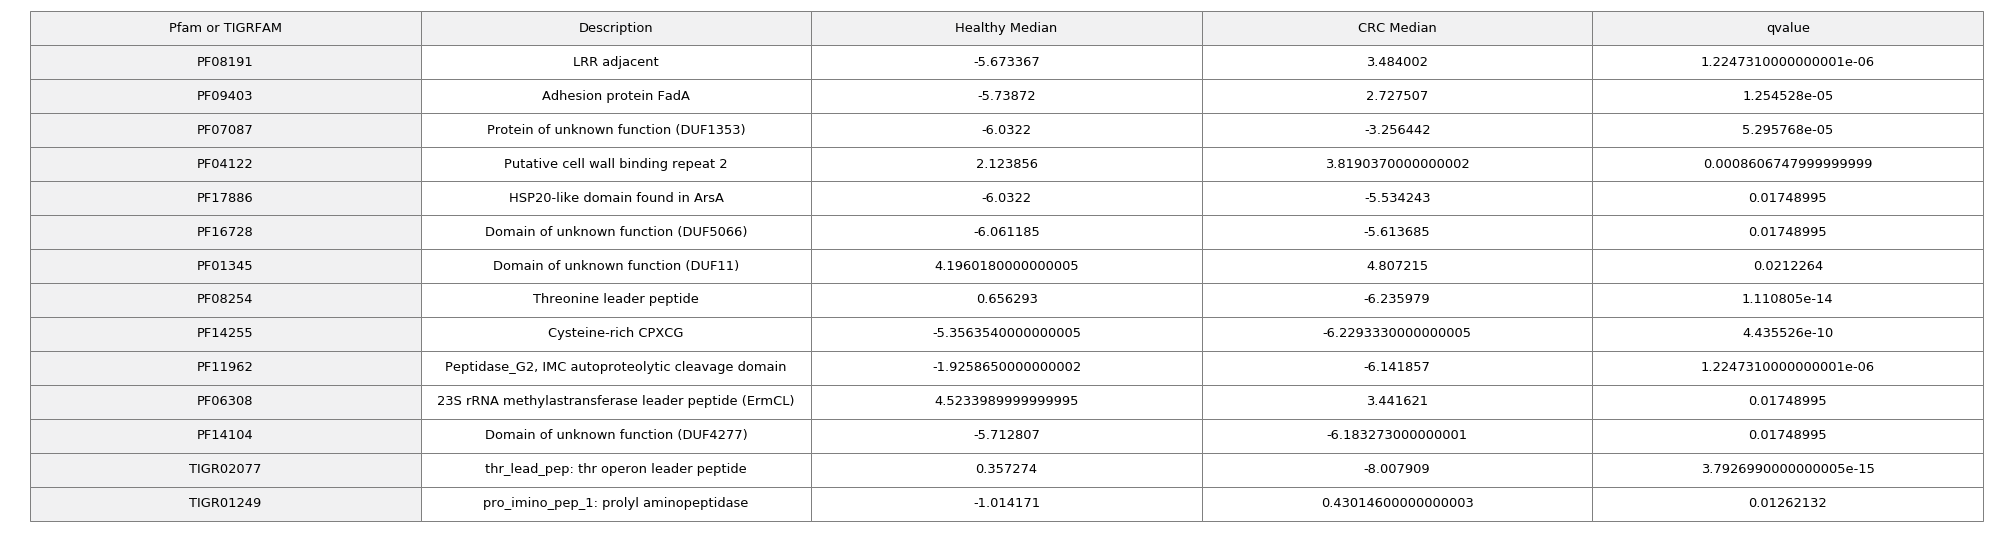

In [11]:
import six
def render_mpl_table(data, col_width=1.0, row_height=0.625, font_size=13,
                     header_color='#f1f1f2', row_colors=['w', 'w'], edge_color='grey',
                     bbox=[0, 0, 1, 1], header_columns=0, 
                     ax=None, **kwargs):
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    tab_2 = []
    for i in data.values:
        numm = 0
        tempList = []
        for j in i:
            if numm < 3:
                tempList.append(j)
            else:
                tempList.append(j)
            numm+=1
        tab_2.append(tempList)
        
    mpl_table = ax.table(cellText=tab_2, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='normal', color='black', )
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

fig = render_mpl_table(functionTableDF.reset_index(), header_columns=1, col_width=7.0)
#plt.savefig("DAPfamTIGRFAM.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Compute Dataframes and pvalues

In [13]:
from matplotlib import rcParams
def drawGraphOut(graphDF, networkName, columnName):
    import scipy.stats as st
    import math
    rcParams['figure.figsize'] = 11.7,8.27
    sns.set(font_scale=1.5)
    
    nt2, np2 = st.normaltest(graphDF[columnName])
    
    meann = graphDF[columnName].mean()
    stdd = graphDF[columnName].std()
    myVar = np.var(graphDF[columnName])
    myStat = eDF.loc[networkName, columnName]
    zscore = (myStat-meann)/stdd
    
    plt.axvline(meann-(stdd*1.96),0,color='gold')
    plt.axvline(meann-(stdd*1),0,color='gold')
    plt.axvline(meann-(1.96*(stdd/math.sqrt(1000))),0,color='grey')
    plt.axvline(graphDF[columnName].mean(),0, color='black')
    plt.axvline(meann+(1.96*(stdd/math.sqrt(1000))),0,color='grey')
    plt.axvline(meann+(stdd*1),0,color='gold')
    plt.axvline(meann+(stdd*1.96),0,color='gold')
    plt.axvline(myStat,0, color='red', label="Network")
    sns.distplot(graphDF[columnName], kde=False)
    
    print("Network: "+networkName)
    print("Network Statistic: "+columnName)
    print("Mean: "+str(meann))
    print("Variance: "+str(myVar))
    print("Standard Deviation: "+str(stdd))
    print("95% Confidence Interval Lower: "+str(meann-(1.96*(stdd/math.sqrt(1000)))))
    print("95% Confidence Interval Upper: "+str(meann+(1.96*(stdd/math.sqrt(1000)))))
    print("My Statistic: "+str(myStat))
    print("Z Score: "+str(zscore)) #Zscore is how many std away from the mean my stat is.
    p_values = st.norm.sf(abs(zscore))*2 #twosided
    print("P_Value: "+str(p_values))
    #print("P-Value: "+str(1-(st.norm.cdf(zscore))))
    

In [14]:
def MonteCarloSimulationPvalues(model1, globaldf, networkName):
    
    ModeDict = ["Erdos-Renyi"]
    
    dfList2 = {"Model":[], "ASPL":[], "Genera_Assortativity":[], "Degree_Assortativity":[], "Transitivity":[],"Modularity":[]}
    keyss = list(dfList2.keys())
    keyss.pop(0)
    dfList3 = dfList2.copy()
    
    for model in ModeDict:
        
        if model == 'Erdos-Renyi':
            modelCompDF = model1.copy()
            
        dfList2["Model"].append(model)
        dfList3["Model"].append(model)

        
        for key in keyss:
            
            #Test to see if the value is greater or smaller than the models mean:
            
            if globaldf.at[networkName, key] > modelCompDF[key].mean():
                #Count how many times the real network was less then the model values
                myCountLarge = 0
                for row in modelCompDF.index:
                    if modelCompDF.at[row, key] >= globaldf.at[networkName, key]:
                        myCountLarge += 1
                
                pvalue = (myCountLarge+1)/(1001)
                
                #print("Large")
                #print(model)
                #print(key)
                #print(myCountLarge)
                #print(pvalue)
                #print("\n")
                
                if pvalue < (0.05):
                    dfList2[key].append("Reject: "+str(pvalue))
                    dfList3[key].append("Our Network: "+str(globaldf.at[networkName, key])+"> Model Mean: "+str(modelCompDF[key].mean()))
                else:
                    dfList2[key].append('Cannot Reject: '+str(pvalue))
                    dfList3[key].append("Our Network: "+str(globaldf.at[networkName, key])+"> Model Mean: "+str(modelCompDF[key].mean()))

                #########################################################################

            elif globaldf.at[networkName, key] < modelCompDF[key].mean():
                
                myCountSmall = 0
                for row in modelCompDF.index:
                    if modelCompDF.at[row, key] <= globaldf.at[networkName, key]:
                        myCountSmall +=1
                
                pvalue = (myCountSmall+1)/(1001)
                
                #print("SMALL")
                #print(model)
                #print(key)
                #print(myCountSmall)
                #print(pvalue)
                #print("\n")
                
                if pvalue < (0.05):
                    dfList2[key].append("Reject: "+str(pvalue))
                    dfList3[key].append("Our Network: "+str(globaldf.at[networkName, key])+"<  Mean: "+str(modelCompDF[key].mean()))

                else:
                    dfList2[key].append('Cannot Reject: '+str(pvalue))
                    dfList3[key].append("Our Network: "+str(globaldf.at[networkName, key])+"< Mean: "+str(modelCompDF[key].mean()))
                ########################################################################

            else:
                continue
                
                    
    df = pd.DataFrame(data=dfList2).set_index("Model")
    df2 = pd.DataFrame(data=dfList3).set_index("Model")

    return df, df2

In [15]:
#CRC Network Comparison
CRC_ModelComp, crc2 = MonteCarloSimulationPvalues(Rdf_crc,eDF, "CRC")
CRC_ModelComp['Cohort'] = 'CRC'
CRC_ModelComp

,ASPL,Genera_Assortativity,Degree_Assortativity,Transitivity,Modularity,Cohort
Model,,,,,,
Erdos-Renyi,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,CRC
Erdos-Renyi,Our Network: 1.6867860562814692< Mean: 3.6434...,Our Network: 0.16636771065939412> Model Mean: ...,Our Network: 0.2870043524786516> Model Mean: -...,Our Network: 0.379139703083365> Model Mean: 0....,Our Network: 0.6892252368014974> Model Mean: 0...,CRC


In [16]:
#CRC Network Comparison
CRC_ModelComp, crc2 = MonteCarloSimulationPvalues(Rdf_healthy,eDF, "Healthy")
CRC_ModelComp['Cohort'] = 'Healthy'
CRC_ModelComp

,ASPL,Genera_Assortativity,Degree_Assortativity,Transitivity,Modularity,Cohort
Model,,,,,,
Erdos-Renyi,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Reject: 0.000999000999000999,Healthy
Erdos-Renyi,Our Network: 1.554327018547202< Mean: 3.71512...,Our Network: 0.1843779748484394> Model Mean: -...,Our Network: 0.4436164483834987> Model Mean: -...,Our Network: 0.452539763981529> Model Mean: 0....,Our Network: 0.7419729424416615> Model Mean: 0...,Healthy
